In [46]:
import math
import random
import decimal
import scipy.linalg
import numpy.random as nrand
import matplotlib.pyplot as plt
import gpflow
import numpy as np
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 6)
plt = matplotlib.pyplot

In [47]:
def ou_values(a,b,dt,sigma,time):
    #This method returns the rate levels of a mean-reverting ornstein uhlenbeck process.
    x = np.zeros(len(time))
    for i in range(0, len(time)-1):
        x[i+1]=x[i]+a*(b-x[i])*dt+math.sqrt(dt)*sigma*np.random.normal(0,1)
    return x

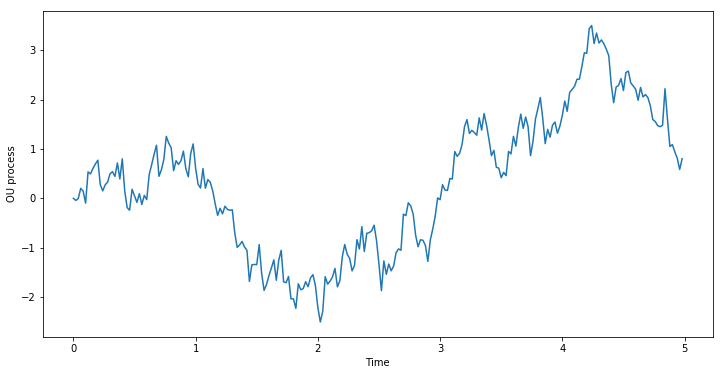

In [48]:
dt=0.02
time=np.arange(0,5,dt)# time
sigma=2
a=1# the coefficient in front, the rate
b=0# the mean
#Simulation of an OU process
x=ou_values(a,b,dt,sigma,time)# the first one is zero because param_all_r0 starts at 0
t=time# time vector
plt.plot(t,x)
plt.xlabel('Time')
plt.ylabel('OU process')
plt.show()

In [49]:
len(time)


250

In [50]:
t_column=t.reshape(-1,1)
x_column=x.reshape(-1,1)

In [51]:
k=gpflow.kernels.Matern12(1, lengthscales=0.3)
meanf = gpflow.mean_functions.Linear(1.0, 0.0)
m = gpflow.models.GPR(t_column,x_column, k, meanf)
m.likelihood.variance = 0.1# get this to be bigger

In [52]:
m.clear()
m.kern.lengthscales.prior = gpflow.priors.Gamma(1., 1.)
m.kern.variance.prior = gpflow.priors.Gamma(1., 1.)
m.likelihood.variance.prior = gpflow.priors.Gamma(1., 1.)
m.mean_function.A.prior = gpflow.priors.Gaussian(0., 10.)
m.mean_function.b.prior = gpflow.priors.Gaussian(0., 10.)
m.compile()
m.as_pandas_table()

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-5d712233-91/X/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-51-0b355a35524f>", line 3, in <module>
    m = gpflow.models.GPR(t_column,x_column, k, meanf)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\models\model.py", line 83, in _build
    self._objective = objective  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 3

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-5d712233-91/X/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-51-0b355a35524f>", line 3, in <module>
    m = gpflow.models.GPR(t_column,x_column, k, meanf)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\models\model.py", line 83, in _build
    self._objective = objective  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 3

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-5d712233-91/Y/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-51-0b355a35524f>", line 3, in <module>
    m = gpflow.models.GPR(t_column,x_column, k, meanf)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\models\model.py", line 83, in _build
    self._objective = objective  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 3

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-5d712233-91/Y/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-51-0b355a35524f>", line 3, in <module>
    m = gpflow.models.GPR(t_column,x_column, k, meanf)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\models\model.py", line 83, in _build
    self._objective = objective  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 3

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'Matern12-0275d403-81/lengthscales/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-51-0b355a35524f>", line 1, in <module>
    k=gpflow.kernels.Matern12(1, lengthscales=0.3)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in _build
    self._prior_tensor = self._build_prior(priors)  File "C:\Users\Ionut\Anaconda3\lib\site-packages

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'Matern12-0275d403-81/lengthscales/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-51-0b355a35524f>", line 1, in <module>
    k=gpflow.kernels.Matern12(1, lengthscales=0.3)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in _build
    self._prior_tensor = self._build_prior(priors)  File "C:\Users\Ionut\Anaconda3\lib\site-packages

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'Matern12-0275d403-81/variance/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-51-0b355a35524f>", line 1, in <module>
    k=gpflow.kernels.Matern12(1, lengthscales=0.3)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in _build
    self._prior_tensor = self._build_prior(priors)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpf

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'Matern12-0275d403-81/variance/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-51-0b355a35524f>", line 1, in <module>
    k=gpflow.kernels.Matern12(1, lengthscales=0.3)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in _build
    self._prior_tensor = self._build_prior(priors)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpf

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-5d712233-91/likelihood/variance/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-51-0b355a35524f>", line 3, in <module>
    m = gpflow.models.GPR(t_column,x_column, k, meanf)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\models\model.py", line 83, in _build
    self._objective = objective  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\paramet

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-5d712233-91/likelihood/variance/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-51-0b355a35524f>", line 3, in <module>
    m = gpflow.models.GPR(t_column,x_column, k, meanf)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\models\model.py", line 83, in _build
    self._objective = objective  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\paramet

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'Linear-8c6e47cd-84/A/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-51-0b355a35524f>", line 2, in <module>
    meanf = gpflow.mean_functions.Linear(1.0, 0.0)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in _build
    self._prior_tensor = self._build_prior(priors)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'Linear-8c6e47cd-84/A/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-51-0b355a35524f>", line 2, in <module>
    meanf = gpflow.mean_functions.Linear(1.0, 0.0)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in _build
    self._prior_tensor = self._build_prior(priors)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'Linear-8c6e47cd-84/b/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-51-0b355a35524f>", line 2, in <module>
    meanf = gpflow.mean_functions.Linear(1.0, 0.0)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in _build
    self._prior_tensor = self._build_prior(priors)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'Linear-8c6e47cd-84/b/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-51-0b355a35524f>", line 2, in <module>
    meanf = gpflow.mean_functions.Linear(1.0, 0.0)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in _build
    self._prior_tensor = self._build_prior(priors)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\

,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/lengthscales,Parameter,"Ga(1.0,1.0)",+ve,True,(),True,0.3
GPR/kern/variance,Parameter,"Ga(1.0,1.0)",+ve,True,(),True,1.0
GPR/likelihood/variance,Parameter,"Ga(1.0,1.0)",+ve,True,(),True,0.1
GPR/mean_function/A,Parameter,"N(0.0,10.0)",(none),True,"(1, 1)",True,[[1.0]]
GPR/mean_function/b,Parameter,"N(0.0,10.0)",(none),True,(),True,0.0


In [53]:
k1=gpflow.kernels.Matern12(1, lengthscales=5,variance=5)
meanf1 = gpflow.mean_functions.Linear(5.0, 10.0)
m1 = gpflow.models.GPR(t_column,x_column, k1, meanf1)
m1.likelihood.variance = 1# get this to be bigger

In [54]:
m1.clear()
m1.kern.lengthscales.prior = gpflow.priors.Gamma(1., 1.)
m1.kern.variance.prior = gpflow.priors.Gamma(1., 1.)
m1.likelihood.variance.prior = gpflow.priors.Gamma(1., 1.)
m1.mean_function.A.prior = gpflow.priors.Gaussian(0., 10.)
m1.mean_function.b.prior = gpflow.priors.Gaussian(0., 10.)
m1.compile()
m1.as_pandas_table()


ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-6c11f740-118/X/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-53-c9c5ebd0160c>", line 3, in <module>
    m1 = gpflow.models.GPR(t_column,x_column, k1, meanf1)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\models\model.py", line 83, in _build
    self._objective = objective  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", li

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-6c11f740-118/X/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-53-c9c5ebd0160c>", line 3, in <module>
    m1 = gpflow.models.GPR(t_column,x_column, k1, meanf1)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\models\model.py", line 83, in _build
    self._objective = objective  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", li

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-6c11f740-118/Y/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-53-c9c5ebd0160c>", line 3, in <module>
    m1 = gpflow.models.GPR(t_column,x_column, k1, meanf1)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\models\model.py", line 83, in _build
    self._objective = objective  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", li

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-6c11f740-118/Y/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-53-c9c5ebd0160c>", line 3, in <module>
    m1 = gpflow.models.GPR(t_column,x_column, k1, meanf1)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\models\model.py", line 83, in _build
    self._objective = objective  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", li

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'Matern12-422b852b-108/lengthscales/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-53-c9c5ebd0160c>", line 1, in <module>
    k1=gpflow.kernels.Matern12(1, lengthscales=5,variance=5)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in _build
    self._prior_tensor = self._build_prior(priors)  File "C:\Users\Ionut\Anaconda3\lib\si

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'Matern12-422b852b-108/lengthscales/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-53-c9c5ebd0160c>", line 1, in <module>
    k1=gpflow.kernels.Matern12(1, lengthscales=5,variance=5)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in _build
    self._prior_tensor = self._build_prior(priors)  File "C:\Users\Ionut\Anaconda3\lib\si

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'Matern12-422b852b-108/variance/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-53-c9c5ebd0160c>", line 1, in <module>
    k1=gpflow.kernels.Matern12(1, lengthscales=5,variance=5)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in _build
    self._prior_tensor = self._build_prior(priors)  File "C:\Users\Ionut\Anaconda3\lib\site-p

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'Matern12-422b852b-108/variance/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-53-c9c5ebd0160c>", line 1, in <module>
    k1=gpflow.kernels.Matern12(1, lengthscales=5,variance=5)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in _build
    self._prior_tensor = self._build_prior(priors)  File "C:\Users\Ionut\Anaconda3\lib\site-p

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-6c11f740-118/likelihood/variance/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-53-c9c5ebd0160c>", line 3, in <module>
    m1 = gpflow.models.GPR(t_column,x_column, k1, meanf1)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\models\model.py", line 83, in _build
    self._objective = objective  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\par

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-6c11f740-118/likelihood/variance/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-53-c9c5ebd0160c>", line 3, in <module>
    m1 = gpflow.models.GPR(t_column,x_column, k1, meanf1)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\models\model.py", line 83, in _build
    self._objective = objective  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\par

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'Linear-5a27fbc0-111/A/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-53-c9c5ebd0160c>", line 2, in <module>
    meanf1 = gpflow.mean_functions.Linear(5.0, 10.0)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in _build
    self._prior_tensor = self._build_prior(priors)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\co

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'Linear-5a27fbc0-111/A/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-53-c9c5ebd0160c>", line 2, in <module>
    meanf1 = gpflow.mean_functions.Linear(5.0, 10.0)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in _build
    self._prior_tensor = self._build_prior(priors)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\co

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'Linear-5a27fbc0-111/b/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-53-c9c5ebd0160c>", line 2, in <module>
    meanf1 = gpflow.mean_functions.Linear(5.0, 10.0)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in _build
    self._prior_tensor = self._build_prior(priors)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\co

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'Linear-5a27fbc0-111/b/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-53-c9c5ebd0160c>", line 2, in <module>
    meanf1 = gpflow.mean_functions.Linear(5.0, 10.0)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in _build
    self._prior_tensor = self._build_prior(priors)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\co

,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/lengthscales,Parameter,"Ga(1.0,1.0)",+ve,True,(),True,5.0
GPR/kern/variance,Parameter,"Ga(1.0,1.0)",+ve,True,(),True,5.0
GPR/likelihood/variance,Parameter,"Ga(1.0,1.0)",+ve,True,(),True,1.0
GPR/mean_function/A,Parameter,"N(0.0,10.0)",(none),True,"(1, 1)",True,[[5.0]]
GPR/mean_function/b,Parameter,"N(0.0,10.0)",(none),True,(),True,10.0


In [55]:
k2=gpflow.kernels.Matern12(1, lengthscales=20,variance=10)
meanf2 = gpflow.mean_functions.Linear(10.0, 5.0)
m2 = gpflow.models.GPR(t_column,x_column, k2, meanf2)
m2.likelihood.variance = 2# get this to be bigger

In [72]:
m2.clear()
m2.kern.lengthscales.prior = gpflow.priors.Gamma(1., 1.)
m2.kern.variance.prior = gpflow.priors.Gamma(1., 1.)
m2.likelihood.variance.prior = gpflow.priors.Gamma(1., 1.)
m2.mean_function.A.prior = gpflow.priors.Gaussian(0., 10.)
m2.mean_function.b.prior = gpflow.priors.Gaussian(0., 10.)
m2.compile()
m2.as_pandas_table()

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-1e8fa62f-156/X/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-56-af1a601c5b08>", line 7, in <module>
    m2.compile()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 59, in compile
    self.initialize(session, force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\models\model.py", line 83, in _build
    self._objective = objective  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in _build
    self._prior_tenso

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-1e8fa62f-156/X/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-56-af1a601c5b08>", line 7, in <module>
    m2.compile()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 59, in compile
    self.initialize(session, force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\models\model.py", line 83, in _build
    self._objective = objective  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in _build
    self._prior_tenso

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-1e8fa62f-156/Y/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-56-af1a601c5b08>", line 7, in <module>
    m2.compile()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 59, in compile
    self.initialize(session, force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\models\model.py", line 83, in _build
    self._objective = objective  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in _build
    self._prior_tenso

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-1e8fa62f-156/Y/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-56-af1a601c5b08>", line 7, in <module>
    m2.compile()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 59, in compile
    self.initialize(session, force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\models\model.py", line 83, in _build
    self._objective = objective  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in _build
    self._prior_tenso

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-1e8fa62f-156/kern/lengthscales/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-56-af1a601c5b08>", line 7, in <module>
    m2.compile()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 59, in compile
    self.initialize(session, force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\models\model.py", line 83, in _build
    self._objective = objective  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in _build
    s

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-1e8fa62f-156/kern/lengthscales/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-56-af1a601c5b08>", line 7, in <module>
    m2.compile()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 59, in compile
    self.initialize(session, force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\models\model.py", line 83, in _build
    self._objective = objective  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in _build
    s

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-1e8fa62f-156/kern/variance/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-56-af1a601c5b08>", line 7, in <module>
    m2.compile()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 59, in compile
    self.initialize(session, force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\models\model.py", line 83, in _build
    self._objective = objective  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in _build
    self.

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-1e8fa62f-156/kern/variance/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-56-af1a601c5b08>", line 7, in <module>
    m2.compile()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 59, in compile
    self.initialize(session, force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\models\model.py", line 83, in _build
    self._objective = objective  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in _build
    self.

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-1e8fa62f-156/likelihood/variance/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-56-af1a601c5b08>", line 7, in <module>
    m2.compile()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 59, in compile
    self.initialize(session, force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\models\model.py", line 83, in _build
    self._objective = objective  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in _build
   

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-1e8fa62f-156/likelihood/variance/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-56-af1a601c5b08>", line 7, in <module>
    m2.compile()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 59, in compile
    self.initialize(session, force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\models\model.py", line 83, in _build
    self._objective = objective  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in _build
   

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-1e8fa62f-156/mean_function/A/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-56-af1a601c5b08>", line 7, in <module>
    m2.compile()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 59, in compile
    self.initialize(session, force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\models\model.py", line 83, in _build
    self._objective = objective  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in _build
    sel

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-1e8fa62f-156/mean_function/A/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-56-af1a601c5b08>", line 7, in <module>
    m2.compile()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 59, in compile
    self.initialize(session, force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\models\model.py", line 83, in _build
    self._objective = objective  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in _build
    sel

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-1e8fa62f-156/mean_function/b/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-56-af1a601c5b08>", line 7, in <module>
    m2.compile()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 59, in compile
    self.initialize(session, force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\models\model.py", line 83, in _build
    self._objective = objective  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in _build
    sel

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-1e8fa62f-156/mean_function/b/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-56-af1a601c5b08>", line 7, in <module>
    m2.compile()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 59, in compile
    self.initialize(session, force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\models\model.py", line 83, in _build
    self._objective = objective  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in _build
    sel

,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/lengthscales,Parameter,"Ga(1.0,1.0)",+ve,True,(),True,20.0
GPR/kern/variance,Parameter,"Ga(1.0,1.0)",+ve,True,(),True,10.0
GPR/likelihood/variance,Parameter,"Ga(1.0,1.0)",+ve,True,(),True,2.0
GPR/mean_function/A,Parameter,"N(0.0,10.0)",(none),True,"(1, 1)",True,[[10.0]]
GPR/mean_function/b,Parameter,"N(0.0,10.0)",(none),True,(),True,5.0


In [ ]:
sampler = gpflow.train.HMC()
samples = sampler.sample(m, num_samples=100, epsilon=0.0032,logprobs=True,lmin=18, lmax=20, burn=100,thin=10)
print('acceptance rate: ', len(set(samples.logprobs))/len(samples.logprobs))
samples = samples.drop('logprobs', axis=1)

In [ ]:
#?sampler.sample

In [ ]:
plt.figure(figsize=(8,4))
for i, col in samples.iteritems():
    plt.plot(col, label=col.name)
plt.legend(loc=0)
plt.xlabel('hmc iteration')
plt.ylabel('parameter value')

In [ ]:
f, axs = plt.subplots(1,3, figsize=(12,4))

axs[0].plot(samples['GPR/likelihood/variance'],
            samples['GPR/kern/variance'], 'k.', alpha = 0.15)
axs[0].set_xlabel('noise_variance')
axs[0].set_ylabel('signal_variance')

axs[1].plot(samples['GPR/likelihood/variance'],
            samples['GPR/kern/lengthscales'], 'k.', alpha = 0.15)
axs[1].set_xlabel('noise_variance')
axs[1].set_ylabel('lengthscale')

axs[2].plot(samples['GPR/kern/lengthscales'],
            samples['GPR/kern/variance'], 'k.', alpha = 0.1)
axs[2].set_xlabel('lengthscale')
axs[2].set_ylabel('signal_variance')

In [ ]:
#plot the function posterior
xx = np.linspace(0, 6, 100)[:,None]
plt.figure(figsize=(12, 6))
for i, s in samples.iloc[::20].iterrows():
    f = m.predict_f_samples(xx, 1, initialize=False, feed_dict=m.sample_feed_dict(s))
    plt.plot(xx, f[0,:,:], 'C0', lw=2, alpha=0.1)
    
plt.plot(t, x, 'kx', mew=2)
_ = plt.xlim(xx.min(), xx.max())
_ = plt.ylim(-8, 9)

In [ ]:
# try l*epsilon=1 # it crashed
sampler = gpflow.train.HMC()
samples = sampler.sample(m, num_samples=100, epsilon=0.0032,logprobs=True,lmin=310, lmax=312, burn=100,thin=10)
print('acceptance rate: ', len(set(samples.logprobs))/len(samples.logprobs))
samples = samples.drop('logprobs', axis=1)

In [ ]:
plt.figure(figsize=(8,4))
for i, col in samples.iteritems():
    plt.plot(col, label=col.name)
plt.legend(loc=0)
plt.xlabel('hmc iteration')
plt.ylabel('parameter value')

In [ ]:
f, axs = plt.subplots(1,3, figsize=(12,4))

axs[0].plot(samples['GPR/likelihood/variance'],
            samples['GPR/kern/variance'], 'k.', alpha = 0.15)
axs[0].set_xlabel('noise_variance')
axs[0].set_ylabel('signal_variance')

axs[1].plot(samples['GPR/likelihood/variance'],
            samples['GPR/kern/lengthscales'], 'k.', alpha = 0.15)
axs[1].set_xlabel('noise_variance')
axs[1].set_ylabel('lengthscale')

axs[2].plot(samples['GPR/kern/lengthscales'],
            samples['GPR/kern/variance'], 'k.', alpha = 0.1)
axs[2].set_xlabel('lengthscale')
axs[2].set_ylabel('signal_variance')

In [ ]:
#plot the function posterior
xx = np.linspace(0, 6, 100)[:,None]
plt.figure(figsize=(12, 6))
for i, s in samples.iloc[::20].iterrows():
    f = m.predict_f_samples(xx, 1, initialize=False, feed_dict=m.sample_feed_dict(s))
    plt.plot(xx, f[0,:,:], 'C0', lw=2, alpha=0.1)
    
plt.plot(t, x, 'kx', mew=2)
_ = plt.xlim(xx.min(), xx.max())
_ = plt.ylim(-8, 9)